In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
boston = pd.read_csv('BostonHousing.csv')

In [12]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
boston.shape

(506, 14)

In [14]:
df = boston

In [15]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

#### 1- categorical features

In [16]:
df.rad.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [17]:
# rad is categorical already, since it index of distance the size of number matters 
# so it looks ordinal and therefore no need for encoding

In [18]:
df.chas.unique()

array([0, 1])

In [19]:
# as long as chas has just two features no need for encoding

#### 2- nul values

In [20]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [21]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [22]:
# apparently no nul values

#### 3- browsing data

In [23]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


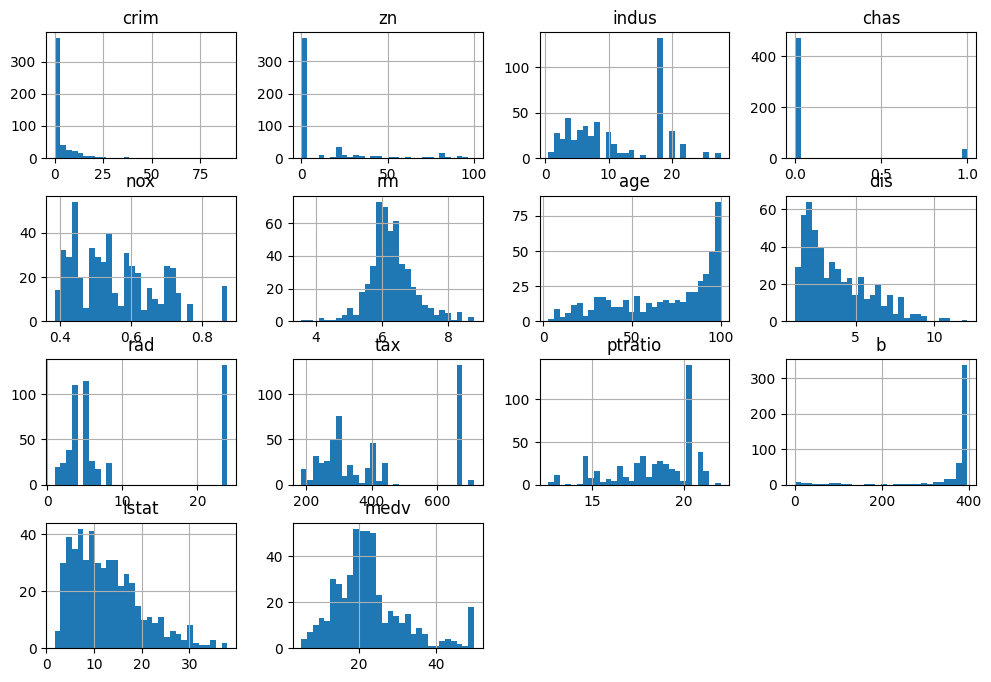

In [25]:
df.hist(bins=30, figsize=(12,8))
plt.show()

In [26]:
len(df.loc[df['chas'] == 1])/len(df)

0.0691699604743083

In [27]:
# as plot shows 'chas' data is so impalanced, so we need to keep the distribution
# for both training and testing data

In [28]:
# # to maintain the propostions for features, we use stratified_split method 
# # instead of train_test_split
# from sklearn.model_selection import StratifiedShuffleSplit
# # Create a StratifiedShuffleSplit object
# stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# for train_index, test_index in stratified_split.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

# the above command didn't work(apparently not suitable for regression modeling!)

In [29]:
X = df.drop('medv', axis=1)
y = df['medv'].copy()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
len(X_train.loc[df['chas'] == 1])/len(X_train)

0.06930693069306931

In [43]:
len(X_test.loc[df['chas'] == 1])/len(X_test)

0.06862745098039216

In [44]:
# I just checked 'chas' and fortunately train_test_split maintained the distributions!

#### processing and transformation

In [45]:
# there is no null value in the data set so no need for filling

In [46]:
# also as mentioned there are only two categorical feaures in the data set: rad & chas
# chas is binary and doesn't need encoding
# rad is categorical but it looks the size of numbers matters so it seems ordinal and no need encoding

#### sclae up

In [55]:
boston_train_num = X_train.select_dtypes(include=[np.number])

In [56]:
boston_train_num.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
232,0.57529,0.0,6.20,0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97


In [57]:
boston_train_num.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [59]:
boston_test_num = X_test.select_dtypes(include=[np.number])

In [54]:
# we know 'rad' and 'chas' as categorical but no need to exclude them from the data set
# 'chas' is binary and 'rad' is ordinal so scaling doesn't effect them

In [58]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(boston_train_num)

StandardScaler()

In [60]:
X_train_scaled = std_scaler.transform(boston_train_num)
X_test_scaled = std_scaler.transform(boston_test_num)

### train

In [61]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
lr_model.coef_

array([-1.0612278 ,  1.12578137,  0.00583959,  0.74679314, -2.0507145 ,
        2.51811075,  0.02912916, -3.09736868,  3.25746444, -2.47036743,
       -1.9942054 ,  0.85518429, -3.82677596])

### evaluation

In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [64]:
y_predict = lr_model.predict(X_test_scaled)

In [65]:
r2_score(y_test, y_predict)

0.7910710699081579

In [66]:
mean_squared_error(y_test, y_predict, squared=False)

3.931573568804144

In [67]:
mean_absolute_error(y_test, y_predict)

2.8392926157037857

In [69]:
mean_absolute_percentage_error(y_test, y_predict)

0.14746934957513086

In [1]:
# r2 about 80%

# about 15% mean absolute error percentage

In [42]:
from pandas.plotting import scatter_matrix

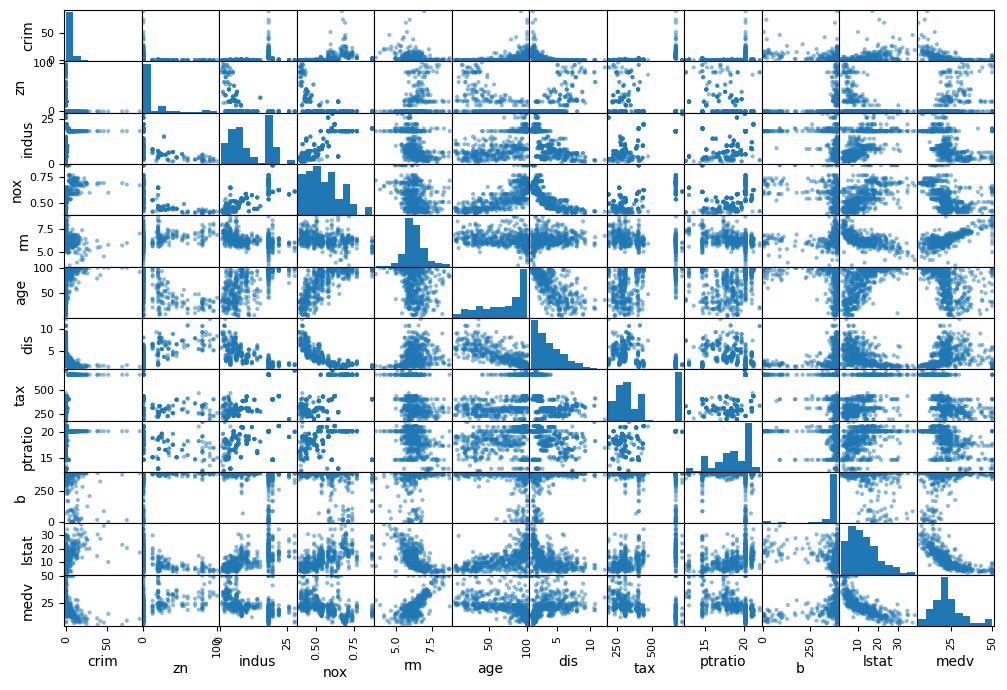

In [45]:
attributes = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat', 'medv']
scatter_matrix(df[attributes], figsize=(12,8))
plt.show()